### importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sweetviz as sv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

### setting up the display max rows and column options

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

### importing dataset

In [ ]:
X= pd.read_csv('train_values.csv')
y= pd.read_csv('train_labels.csv')

In [5]:
X.shape

(260601, 39)

In [6]:
y.shape

(260601, 2)

### checking commong rows

In [7]:
merged_df = X.merge(y, on='building_id')
num_common_rows = merged_df.shape[0]
print("Number of common rows:", num_common_rows)


Number of common rows: 260601


### Merging datasets

In [8]:
data = pd.merge(X, y)
data.to_csv('data.csv', index=False)

In [9]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


### Droppint unwanted columns

In [10]:
data.drop('building_id', axis=1, inplace=True,)

In [11]:
data['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

### EDA
1. 'building_id': Represents the unique identifier for each building.
2. 'geo_level_1_id': Represents the geographical level 1 identifier.
3. 'geo_level_2_id': Represents the geographical level 2 identifier.
4. 'geo_level_3_id': Represents the geographical level 3 identifier.
5. 'count_floors_pre_eq': Indicates the number of floors the building had before the earthquake.
6. 'age': Represents the age of the building in years.
7. 'area_percentage': Represents the normalized area of the building footprint.
8. 'height_percentage': Represents the normalized height of the building.
9. 'land_surface_condition': Represents the condition of the land where the building is located.
10. 'foundation_type': Represents the type of foundation used for the building.
11. 'roof_type': Represents the type of roof used for the building.
12. 'ground_floor_type': Represents the type of the ground floor.
13. 'other_floor_type': Represents the type of floors other than the ground floor.
14. 'position': Represents the position of the building.
15. 'plan_configuration': Represents the architectural plan configuration of the building.
16. 'has_superstructure_adobe_mud': Indicates if the building has superstructure made of adobe or mud.
17. 'has_superstructure_mud_mortar_stone': Indicates if the building has superstructure made of mud mortar and stones.
18. 'has_superstructure_stone_flag': Indicates if the building has superstructure made of stone.
19. 'has_superstructure_cement_mortar_stone': Indicates if the building has superstructure made of cement mortar and stones.
20. 'has_superstructure_mud_mortar_brick': Indicates if the building has superstructure made of mud mortar and bricks.
21. 'has_superstructure_cement_mortar_brick': Indicates if the building has superstructure made of cement mortar and bricks.
22. 'has_superstructure_timber': Indicates if the building has superstructure made of timber.
23. 'has_superstructure_bamboo': Indicates if the building has superstructure made of bamboo.
24. 'has_superstructure_rc_non_engineered': Indicates if the building has superstructure made of non-engineered reinforced concrete.
25. 'has_superstructure_rc_engineered': Indicates if the building has superstructure made of engineered reinforced concrete.
26. 'has_superstructure_other': Indicates if the building has superstructure made of other materials.
27. 'legal_ownership_status': Represents the legal ownership status of the land where the building is located.
28. 'count_families': Represents the number of families living in the building.
29. 'has_secondary_use': Indicates if the building has a secondary use.
30. 'has_secondary_use_agriculture': Indicates if the building has a secondary use for agriculture.
31. 'has_secondary_use_hotel': Indicates if the building has a secondary use as a hotel.
32. 'has_secondary_use_rental': Indicates if the building has a secondary use for rental purposes.
33. 'has_secondary_use_institution': Indicates if the building has a secondary use as an institution.
34. 'has_secondary_use_school': Indicates if the building has a secondary use as a school.
35. 'has_secondary_use_industry': Indicates if the building has a secondary use for industrial purposes.
36. 'has_secondary_use_health_post': Indicates if the building has a secondary use as a health post.
37. 'has_secondary_use_gov_office': Indicates if the building has a secondary use as a government office.
38. 'has_secondary_use_use_police': Indicates if the building has a secondary use as a police station.
39. 'has_secondary_use_other': indicates whether the building has a secondary use for purposes other than the ones specified above.
40. 'damage_grade': Represents the level of damage caused to the building during the earthquake. It can have values such as "Low," "Medium," or "High."

### Checking dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [13]:
data.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Checking for missing values

In [14]:
data.isna().sum().sum()

0

In [15]:
data.shape

(260601, 39)

In [16]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(data.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=data.nunique()
dtypes["Null Values"]=data.isnull().sum()
dtypes["% null Values"]=data.isnull().sum()/len(data)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000
roof_type,object,3,0,0.000000


As such ther are no missing values in the dataset

### Damage Grade¶


In [17]:
#checking unique values 
value_counts = data['damage_grade'].value_counts()
print(value_counts)


2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

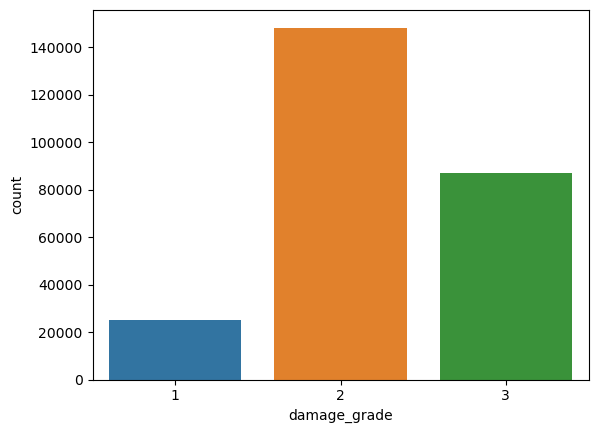

In [18]:
sns.countplot(x = "damage_grade", data = data)
data.loc[:, 'damage_grade'].value_counts()

According to the data the most of the buildings have suffer medium damage grade
sencond highest is the less damage

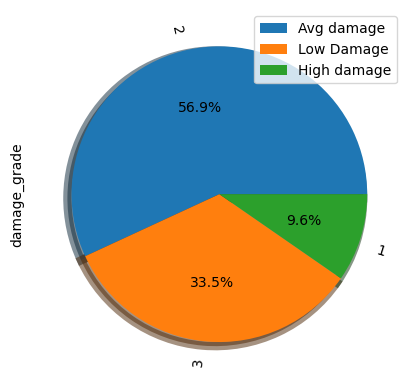

In [19]:
#pie plot                                                          

data["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=1
                                                    )
plt.legend(["Avg damage","Low Damage","High damage"])
plt.show()

OBSERVATIONS

1. 9.61% of bulidings were highly damaged by earthquake.
2. 56.9% of bulidings were medium damaged
3. 33.48% of bulidings were less damaged due to earthquake.

In [20]:
#SEPRATING int and obj column
int_columns = []
obj_columns = []

for column in data.columns:
    if data[column].dtype == 'int64':
        int_columns.append(column)
    elif data[column].dtype == 'object':
        obj_columns.append(column)

print("Integer Columns:", int_columns)
print("Object Columns:", obj_columns)

Integer Columns: ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']
Object Columns: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_ty

### Now we will see if the age of the building affect on damage due to earthquake ?¶


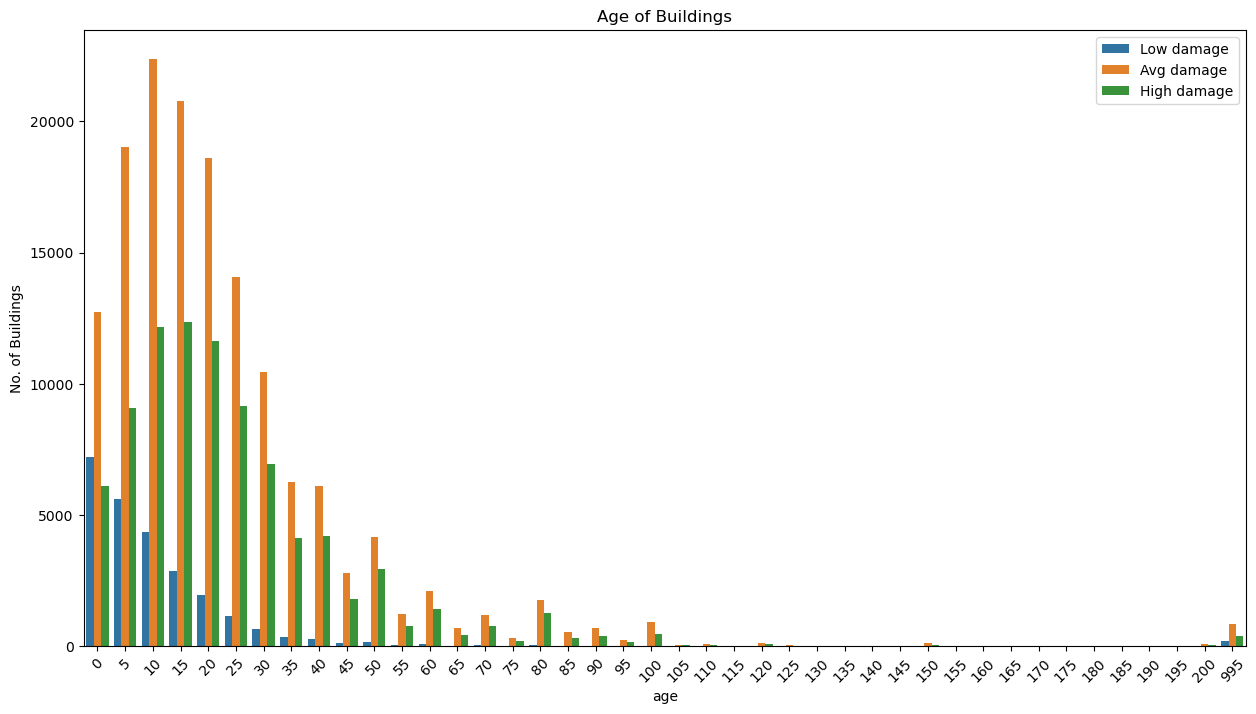

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(x=data["age"], hue=data["damage_grade"],)
plt.ylabel("No. of Buildings")
plt.title("Age of Buildings")
plt.legend(["Low damage", "Avg damage", "High damage"], loc="upper right")
plt.xticks(rotation=45)
plt.show()


OBSERVATIONS
1. Age of majority of the bulidings is between 0-50 years,more than 90% of the houses fall under this range.
2. 2nd highest no. of bulidings are in the category high damage.
3. Hence,The above chart infers that despite the age of building ,most of the time the damage caused to the building is Average damage.

### Does the area of buliding affect on damage caused due to earthquake ?¶

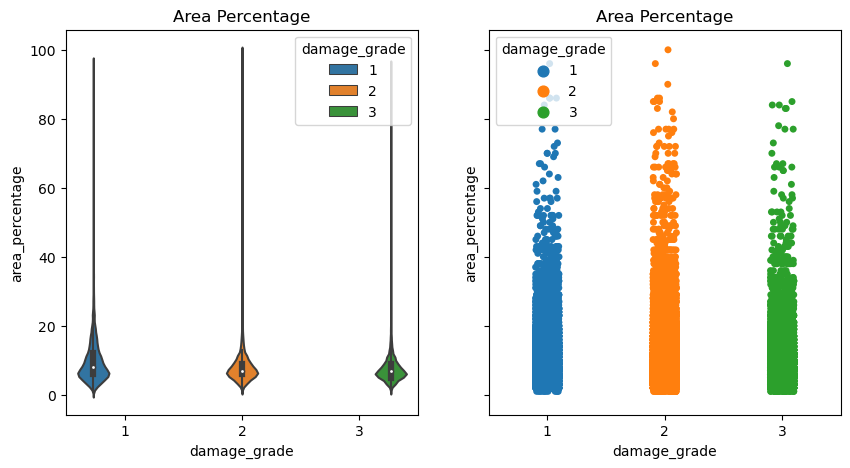

<Figure size 1000x900 with 0 Axes>

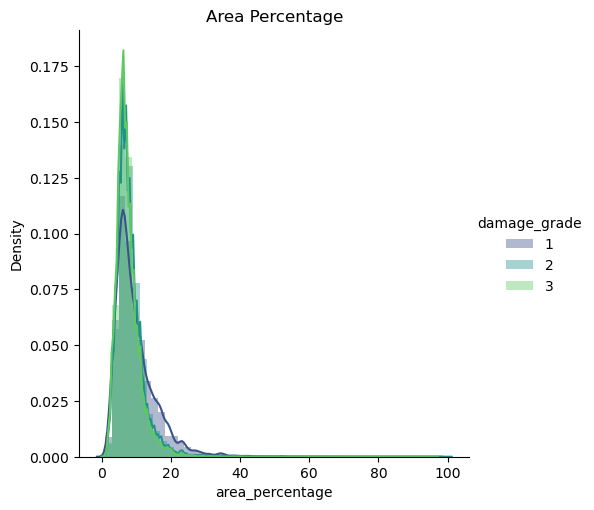

In [22]:
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)

#Violin plot


sns.violinplot(data=data,x='damage_grade',y='area_percentage',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=data,x='damage_grade',y='area_percentage',hue='damage_grade',jitter=True,ax=ax[1])
ax[0].set_title("Area Percentage")
ax[1].set_title("Area Percentage")
plt.show()

#Facet Grid


plt.figure(figsize=(10,9))
sns.FacetGrid(data,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'area_percentage')\
    .add_legend()
plt.title("Area Percentage")
plt.show()

OBSERVATIONS

The above plots infers that as the area of the buliding increases the damaged caused to it also increases.

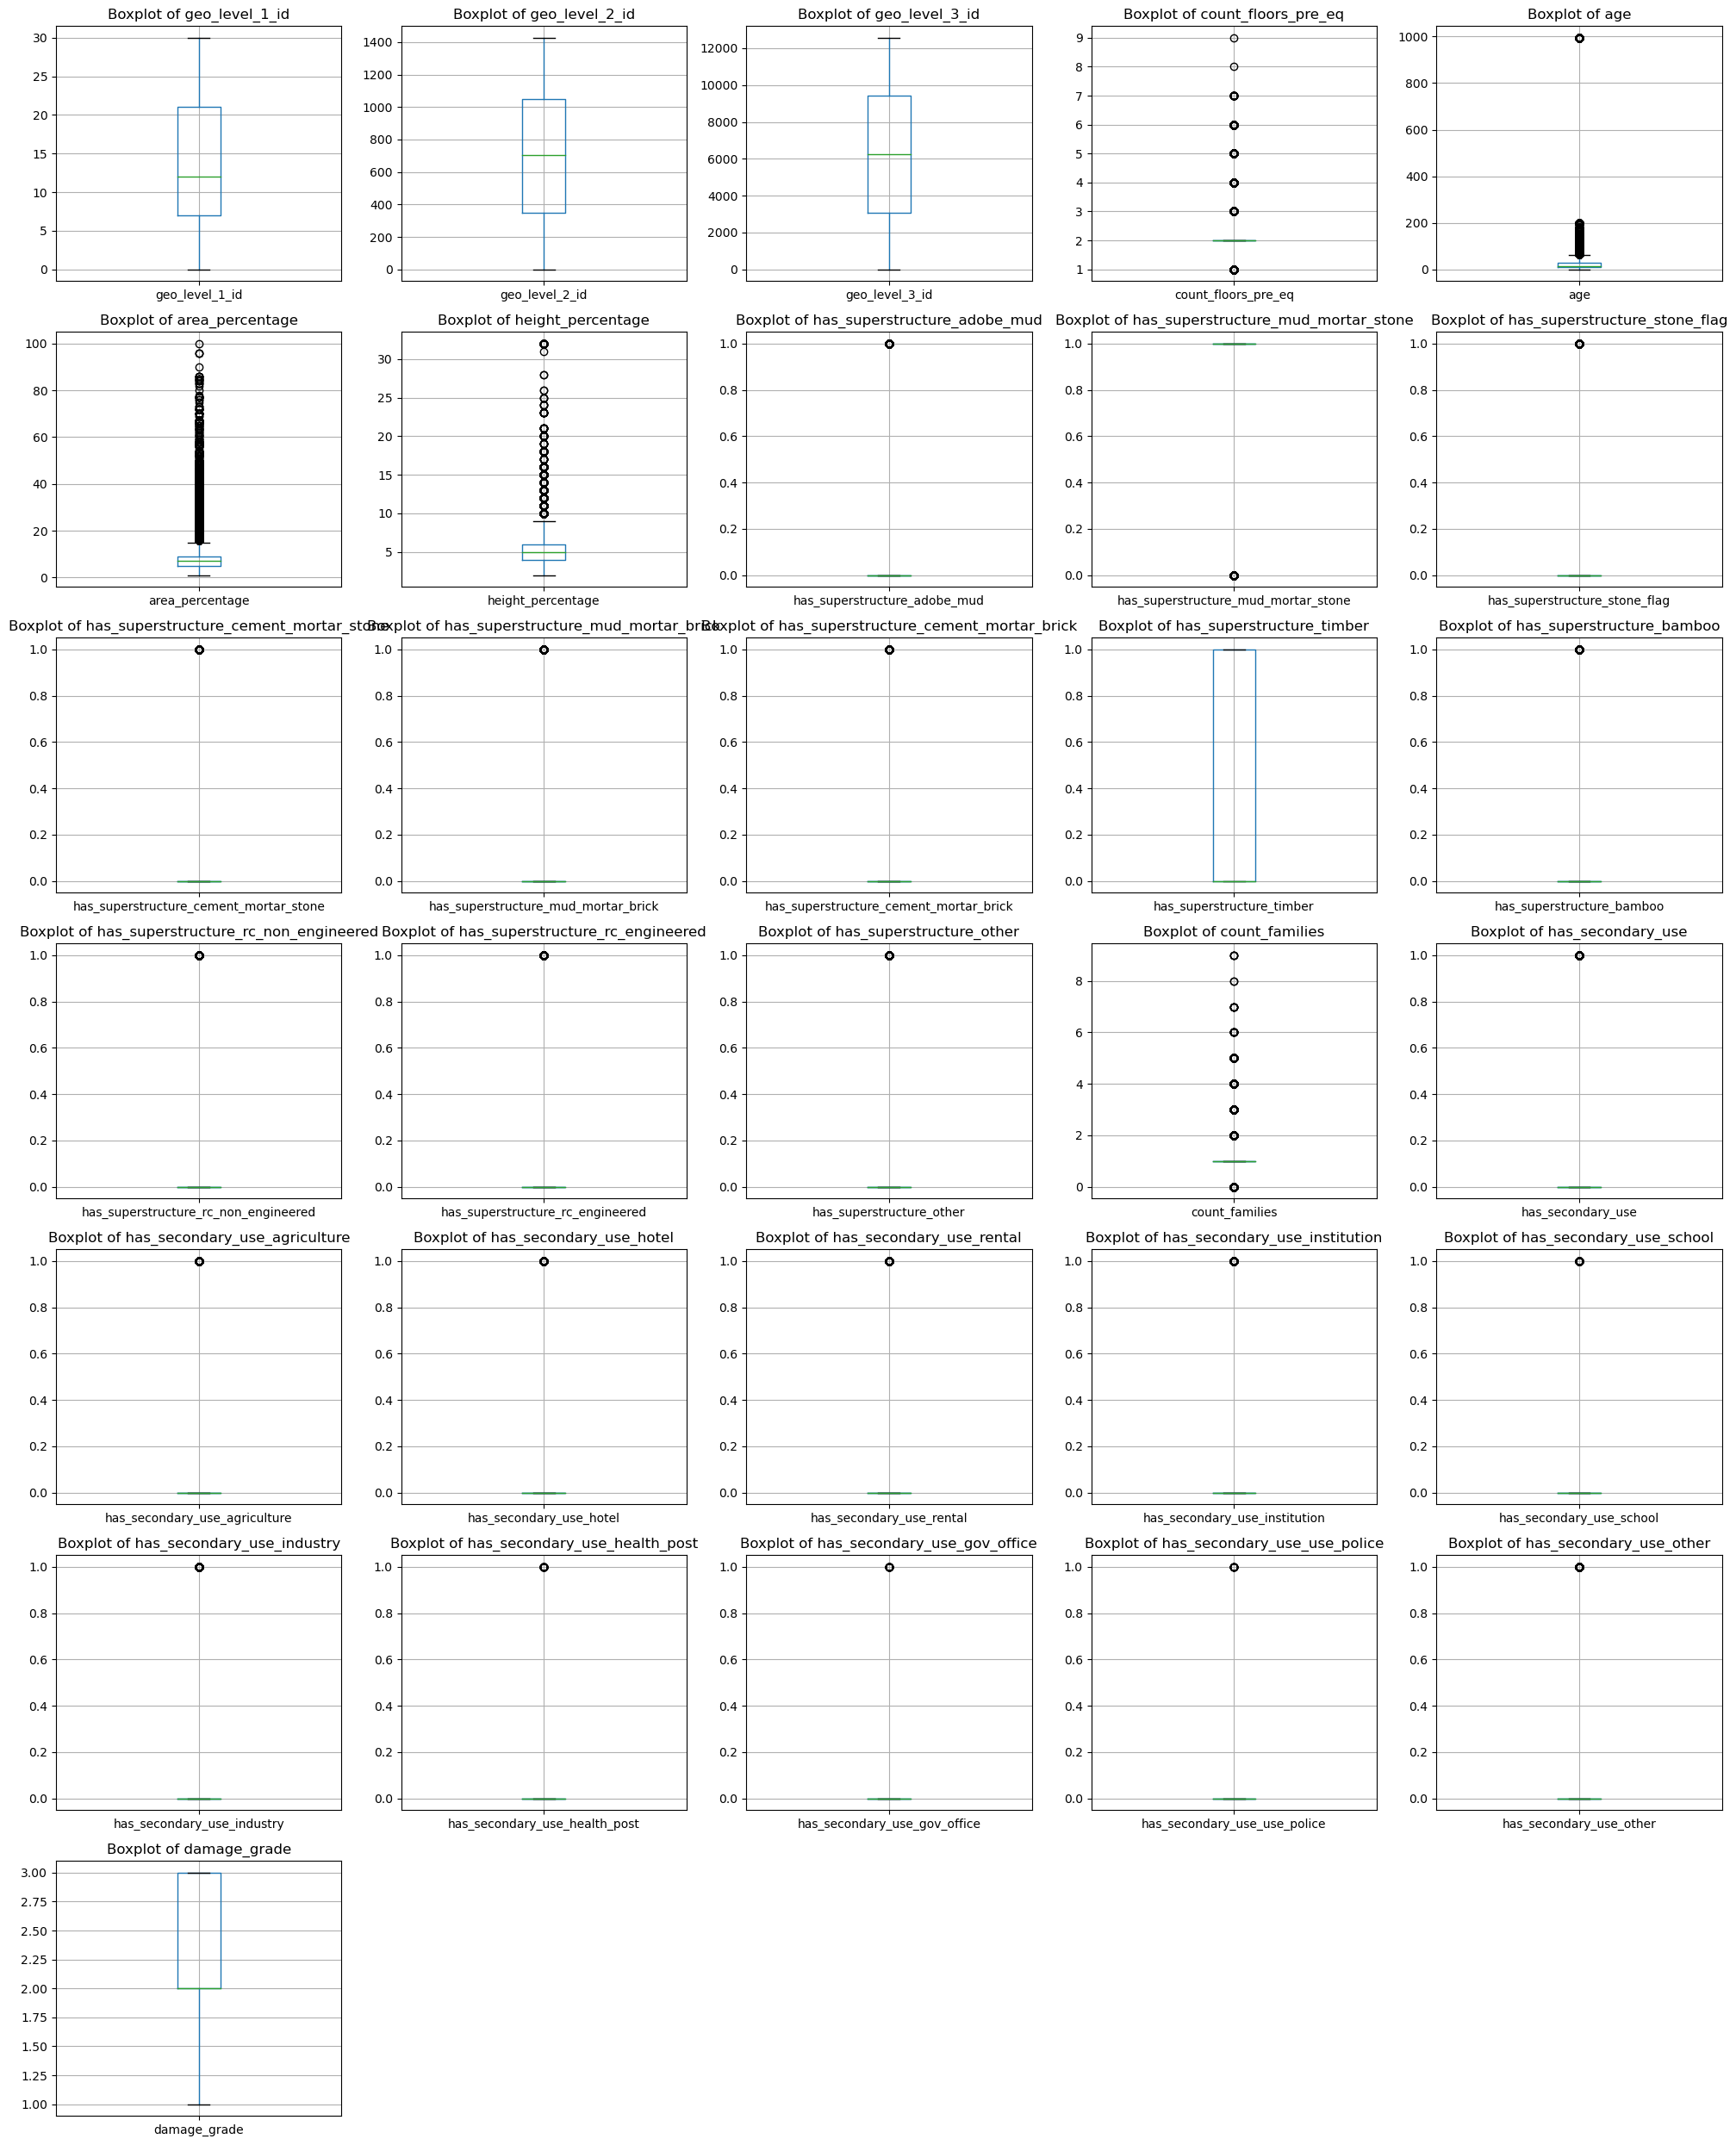

In [23]:
#checking the outliers using boxplot
 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in int_columns:
    if plotnumber<=35 :
        ax = plt.subplot(7,5,plotnumber)
        
        
        data.boxplot(column=column) 
        plt.title('Boxplot of {}'.format(column))

        
    plotnumber+=1
plt.tight_layout()

There are quite a few outliers in the age section

### Dropping outliers

In [24]:
data = data.drop(data[data['age'] > 900].index)

In [25]:
data.shape

(259211, 39)

### Univarient analysis

In [26]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivarient analysis

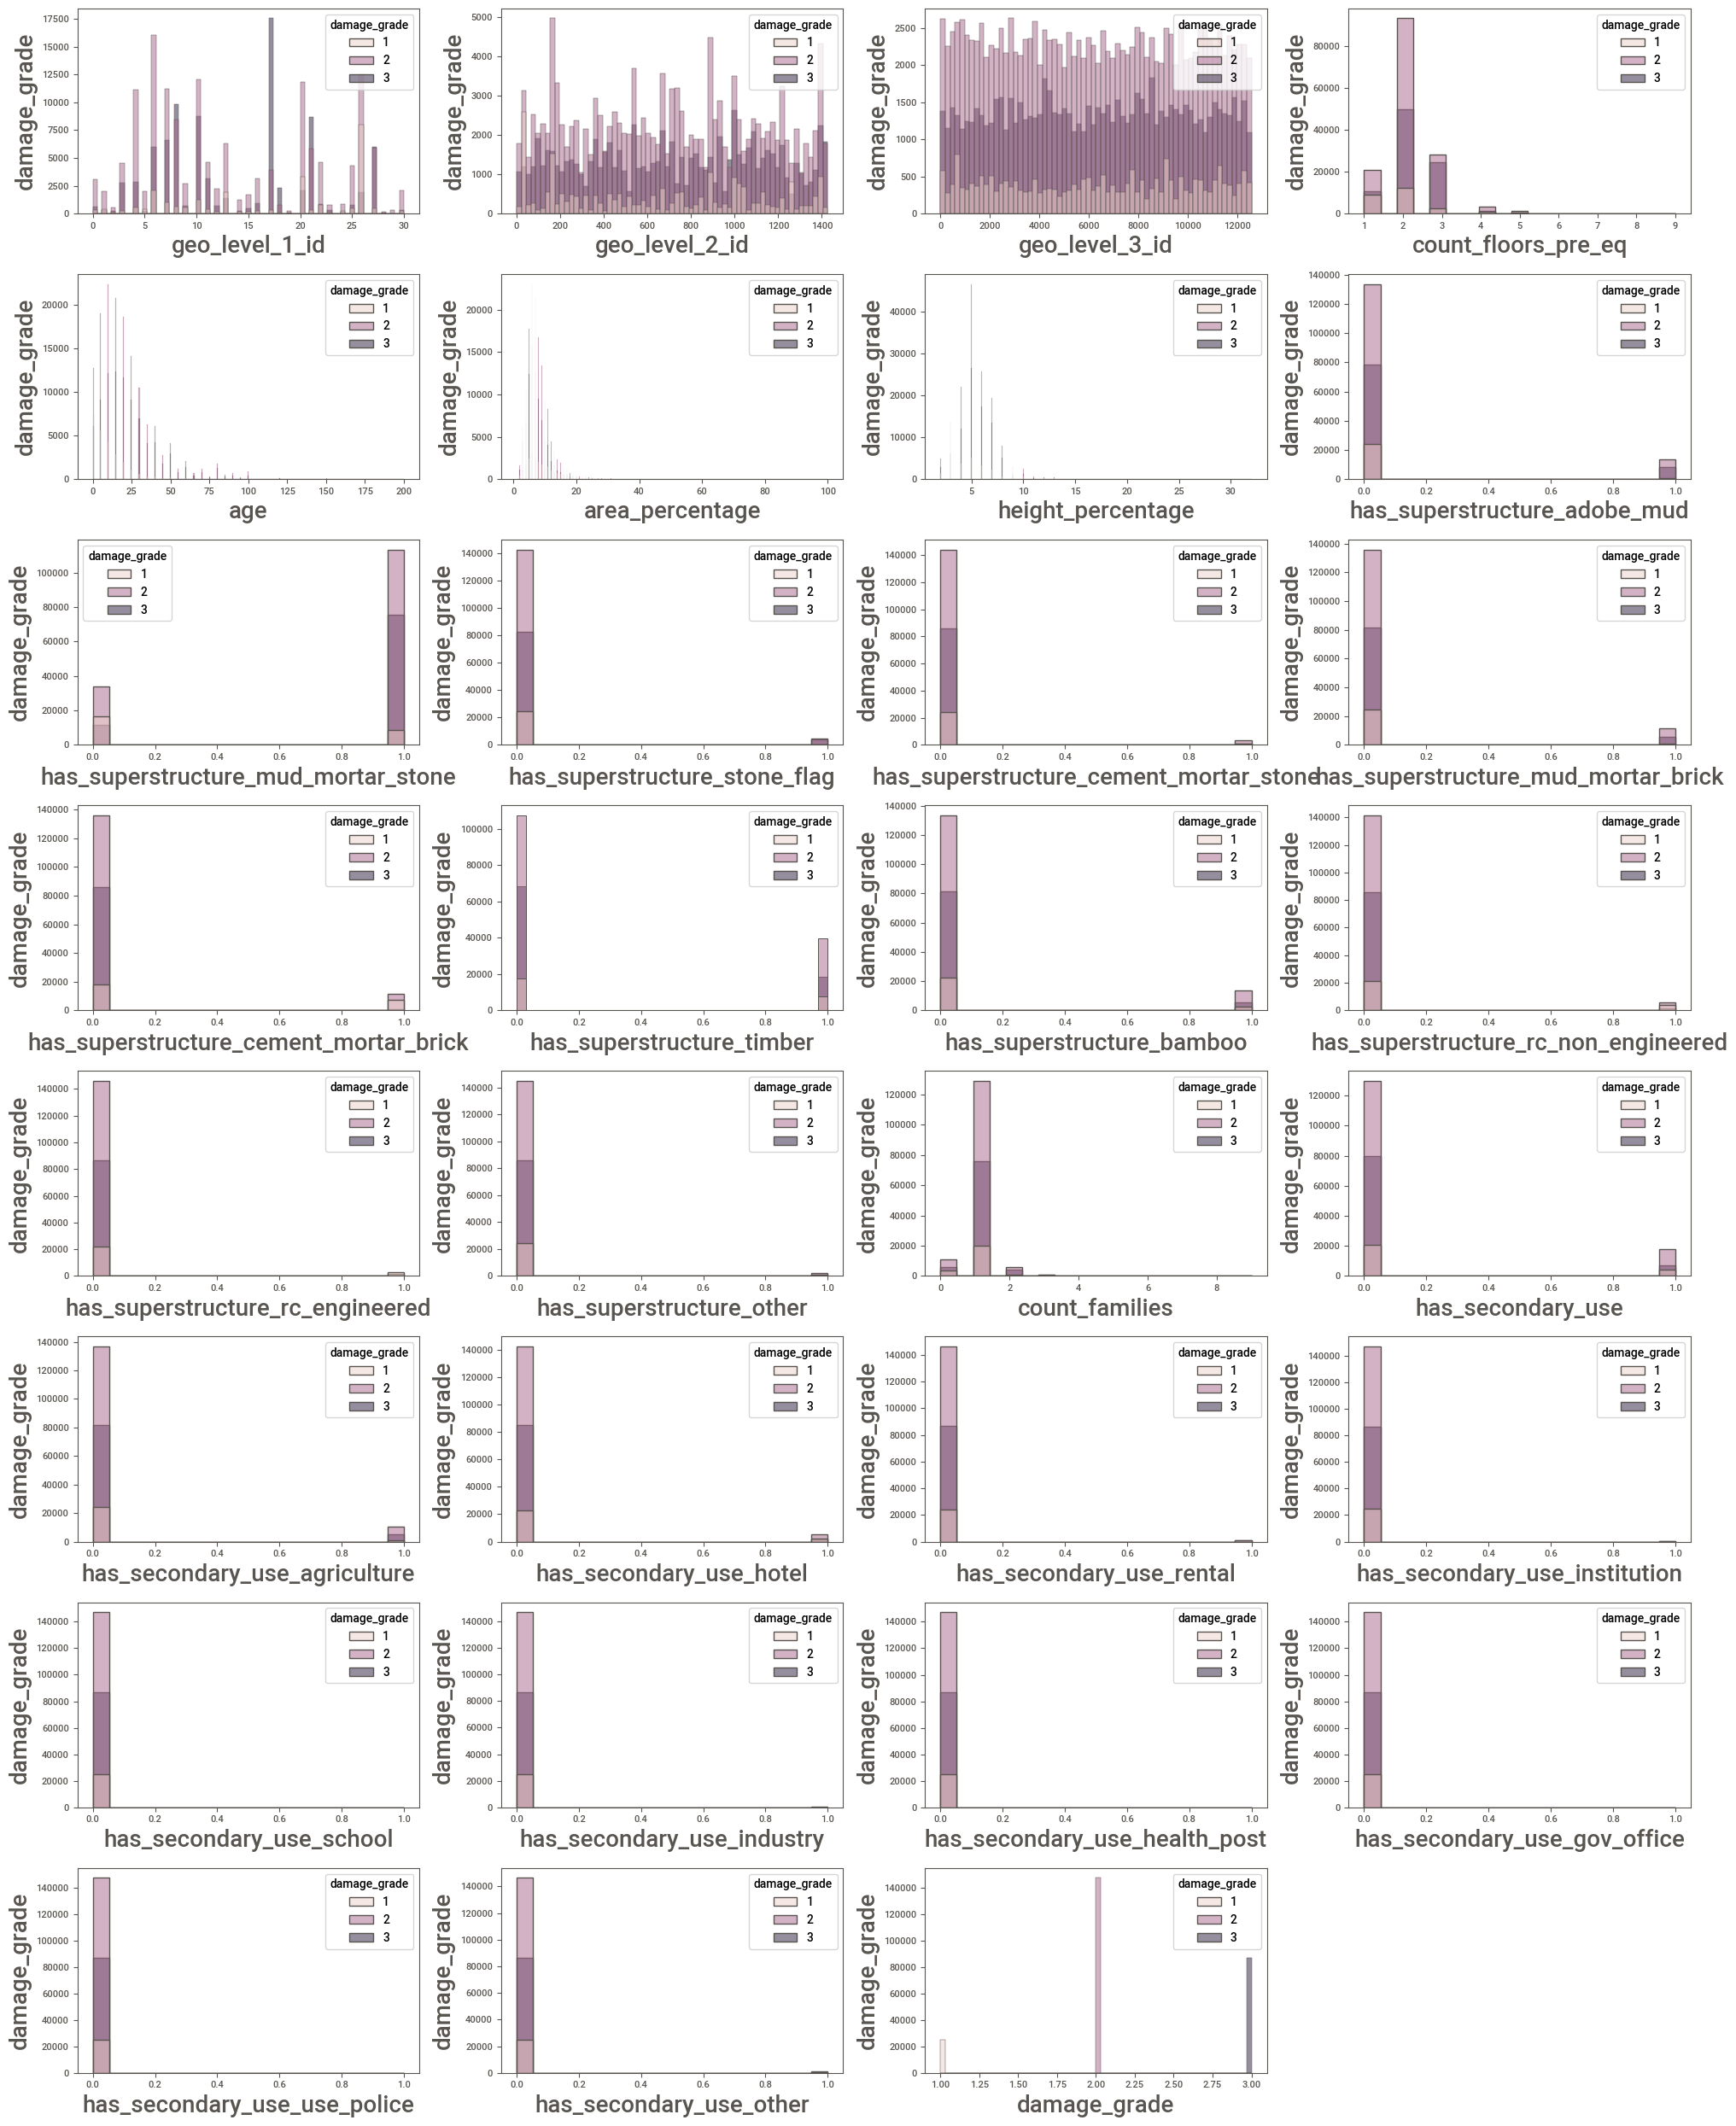

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in int_columns:
    if plotnumber<=32 :
        ax = plt.subplot(8,4,plotnumber)
        sns.histplot(x=data[column].dropna(axis=0)
                        ,hue=data.damage_grade)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnumber+=1
plt.tight_layout()

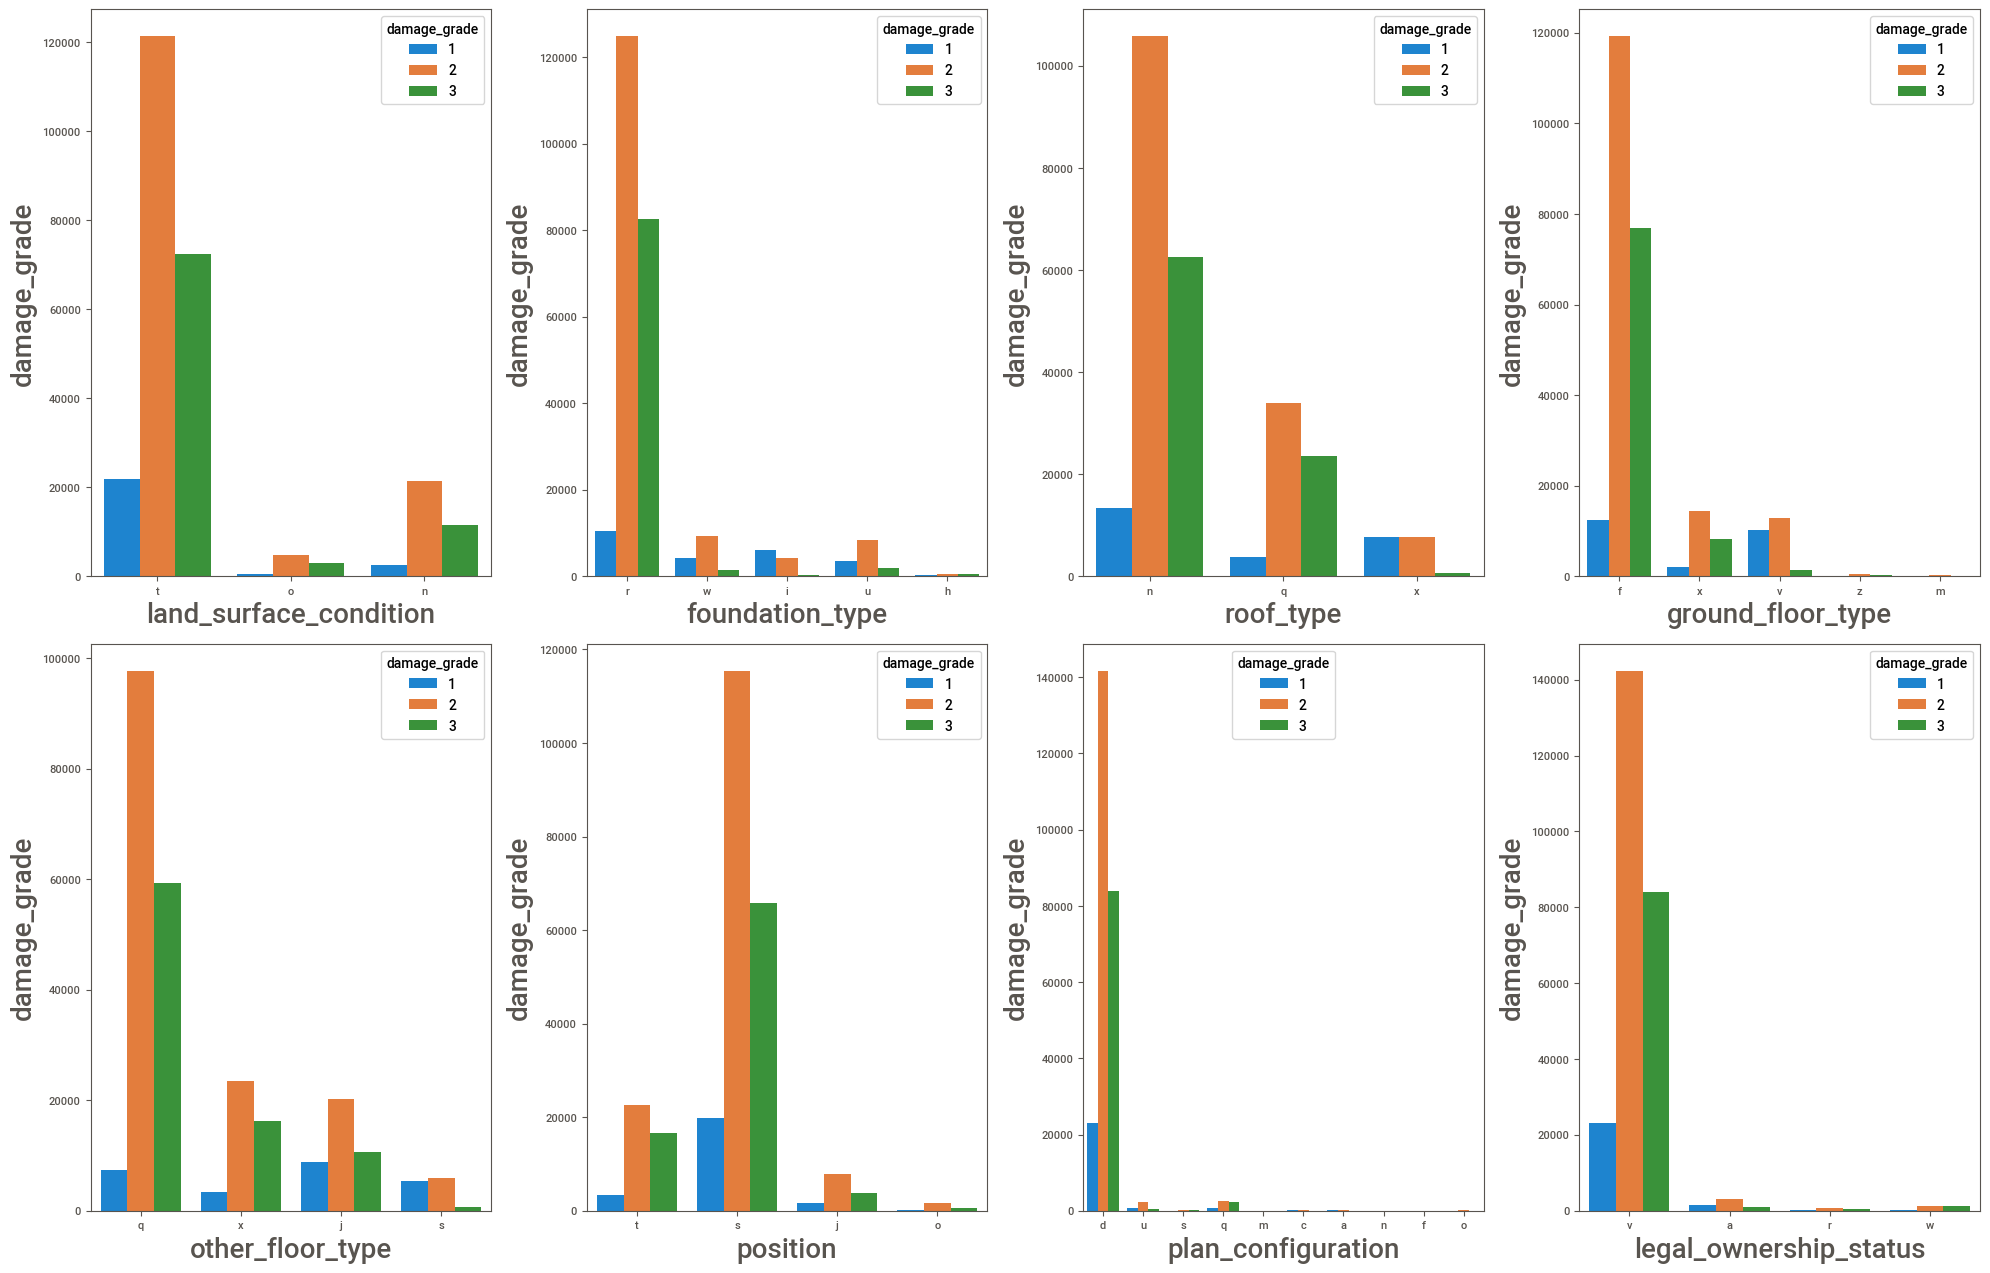

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in obj_columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0)
                        ,hue=data.damage_grade)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [29]:
corr = data[int_columns].corr()

<AxesSubplot:>

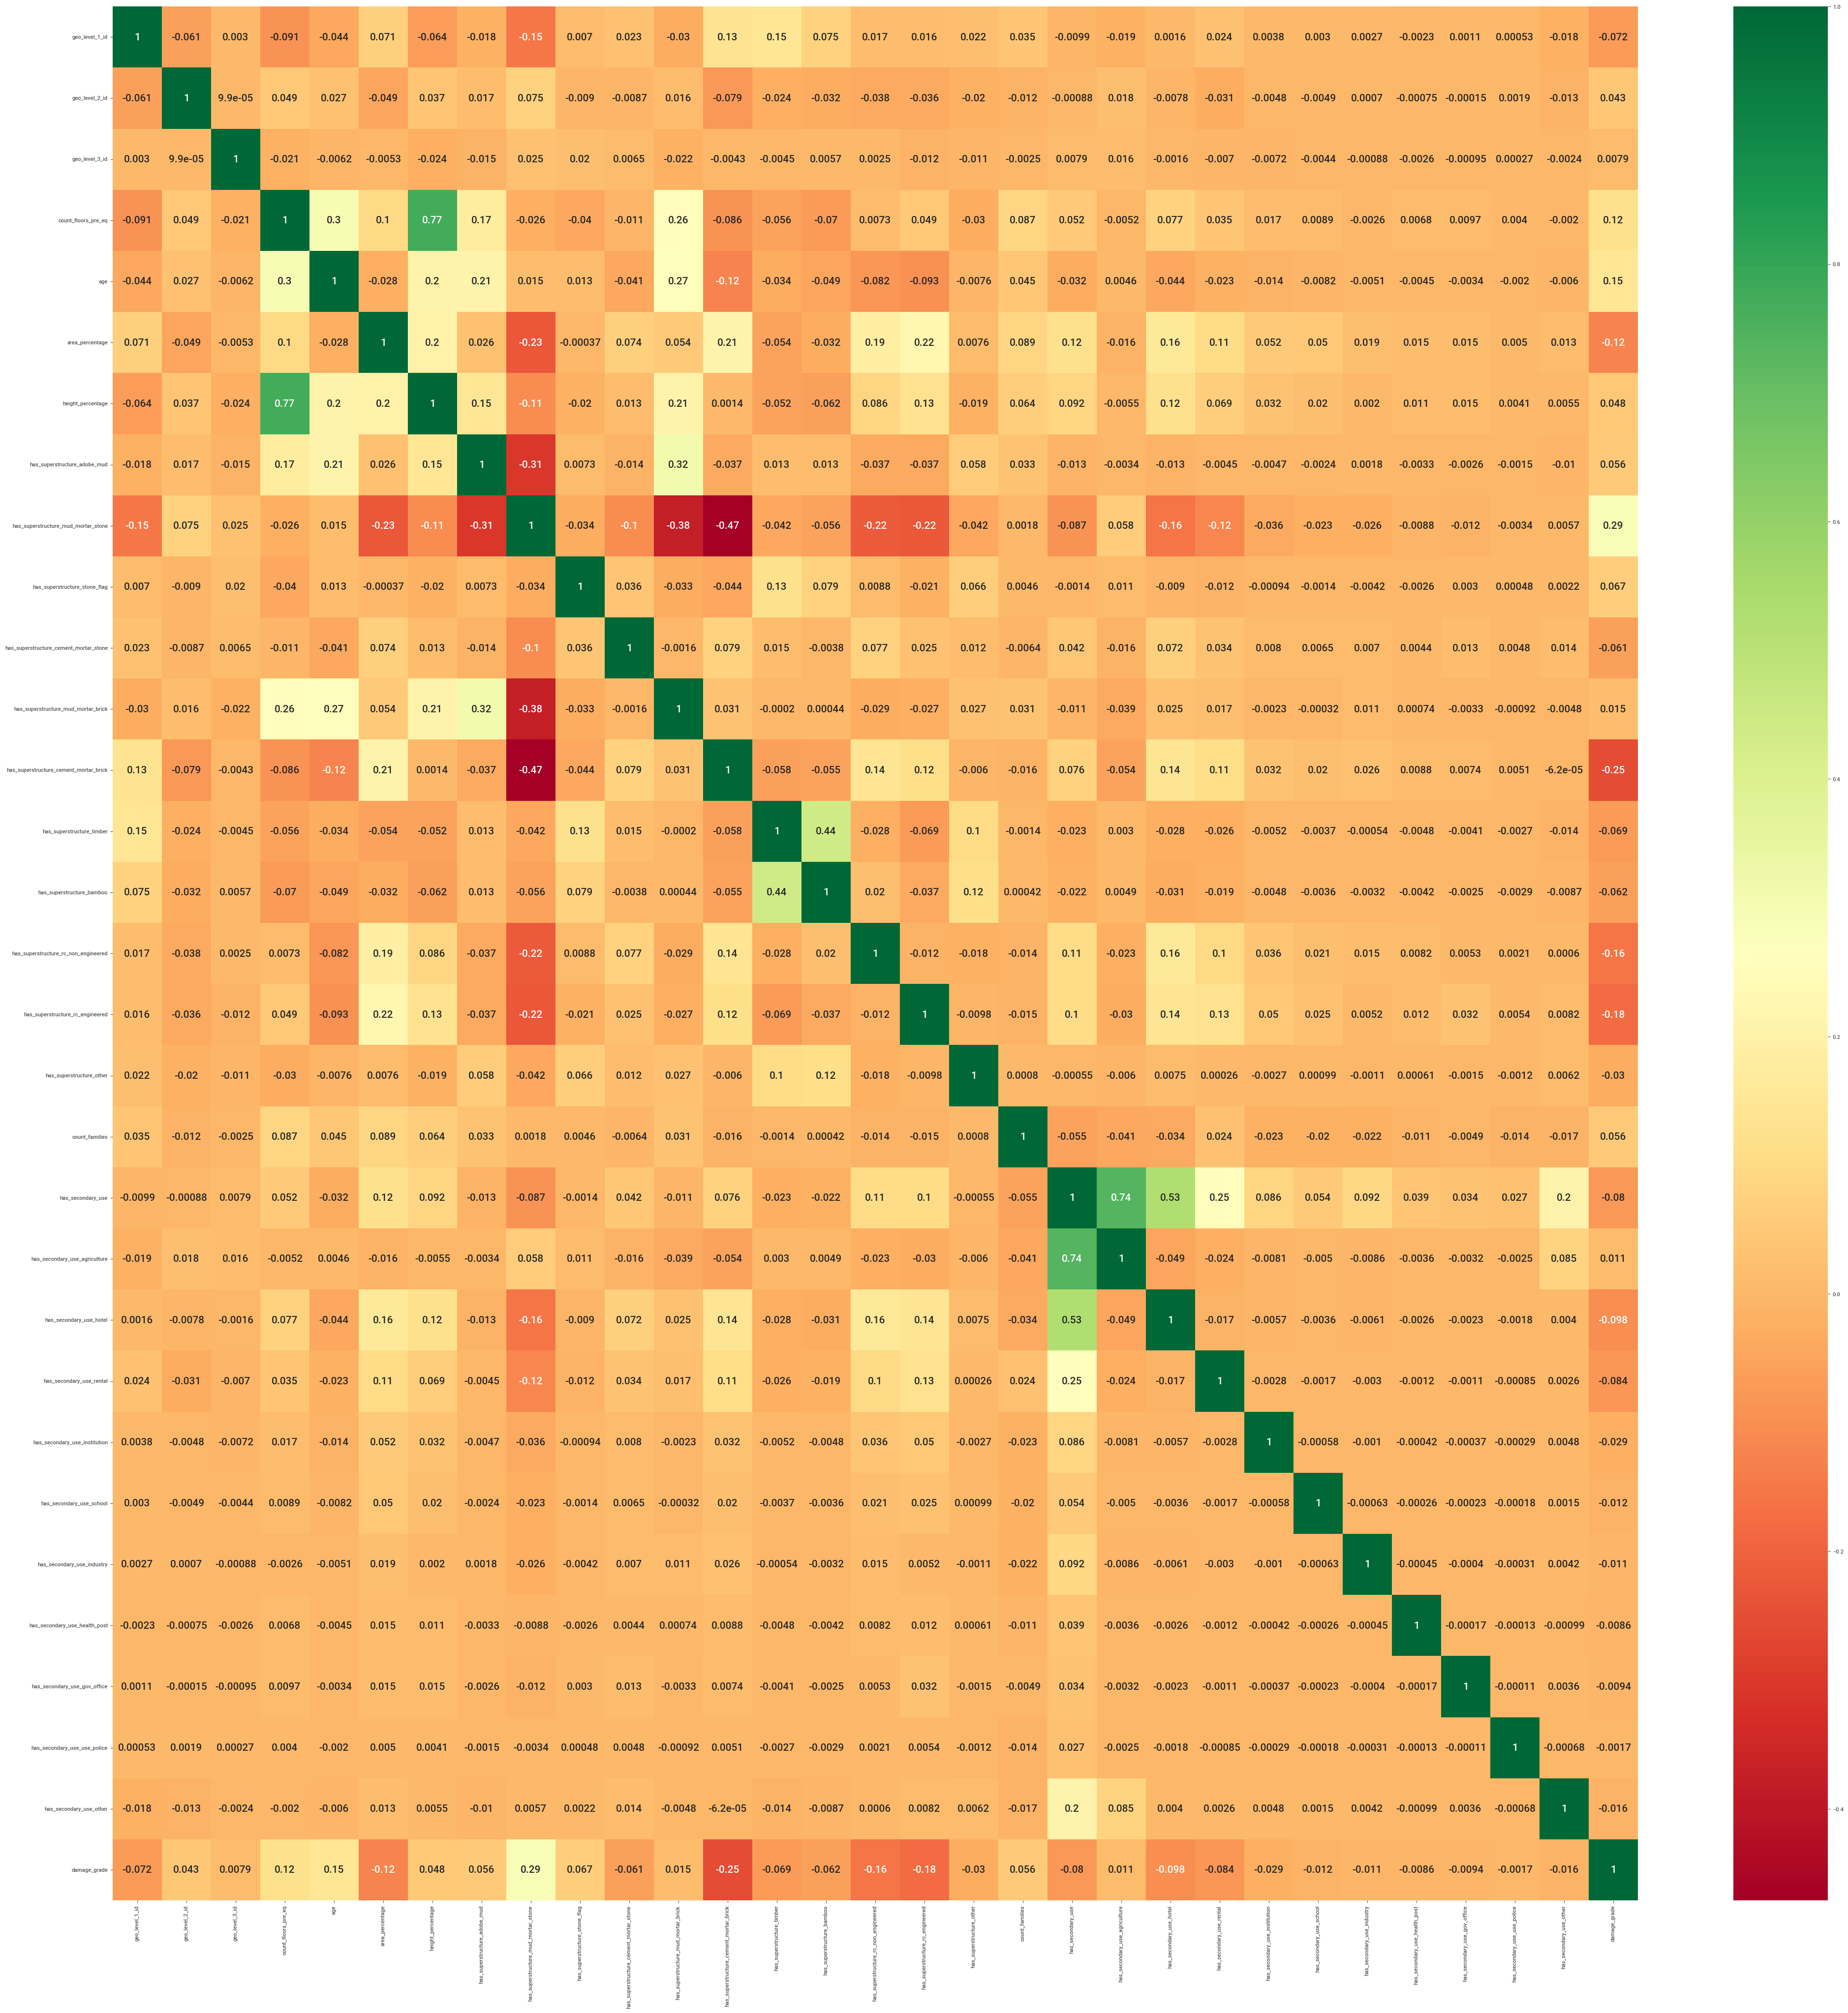

In [30]:
plt.figure(figsize=(50,50))#canvas size

corr = data[int_columns].corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

there are few correlation between the columns but not as much to delete any column

Data before normalizing using kdeplot

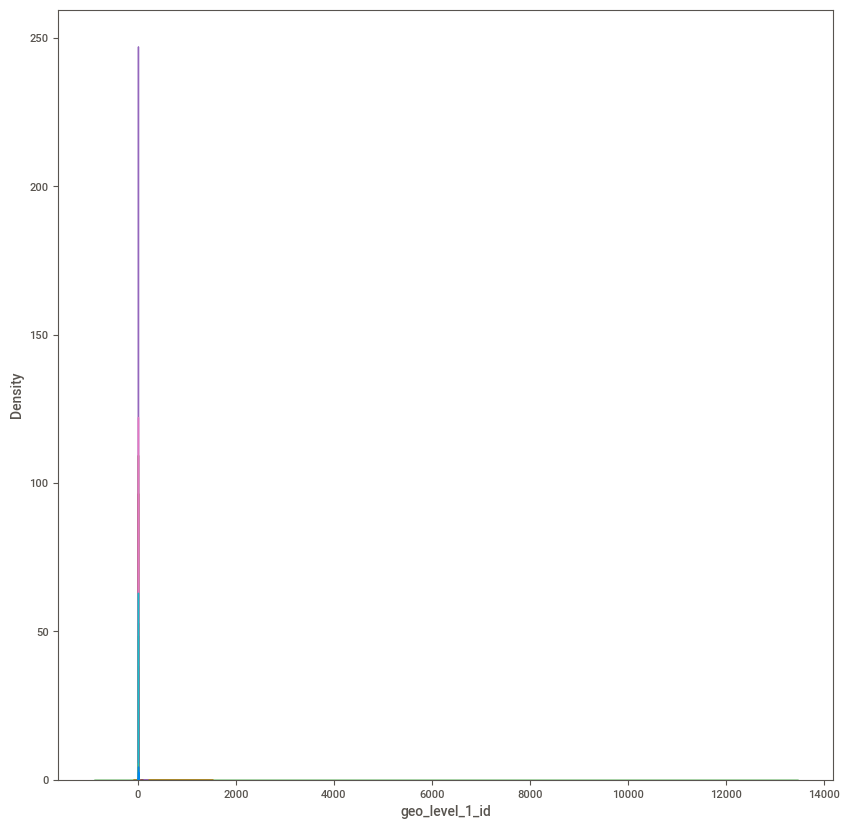

In [31]:
plt.figure(figsize=(10,10))

for column in int_columns:
    sns.kdeplot(data[column], shade=True)
plt.show()

Data after normalizing 

In [32]:
scaler = MinMaxScaler()
Minimized_data = pd.DataFrame(scaler.fit_transform(data[int_columns].copy()), columns=int_columns)

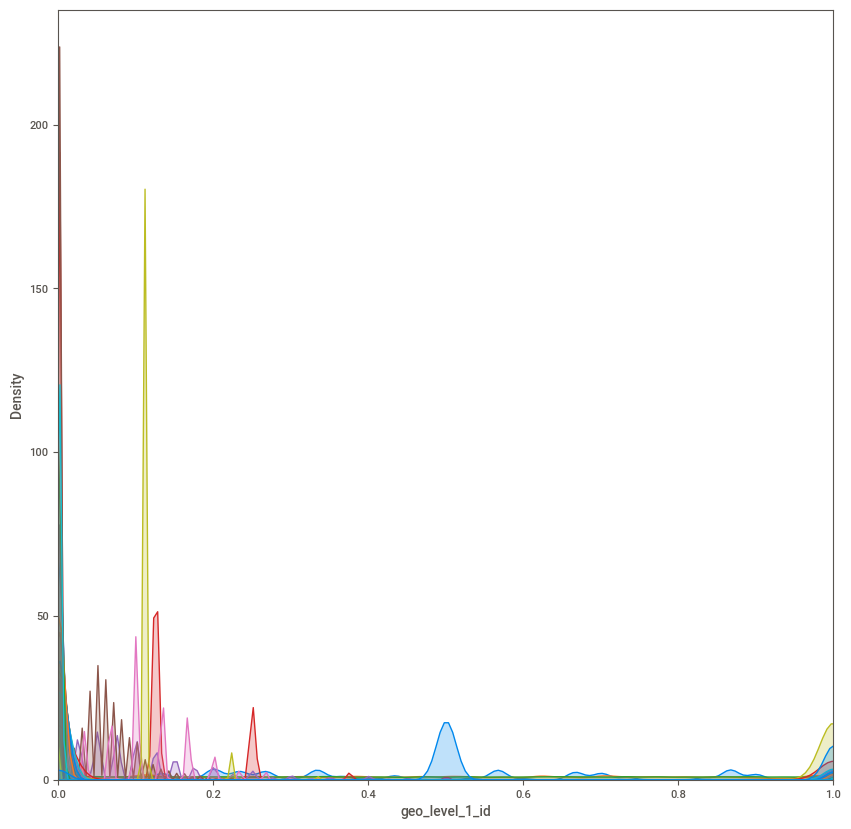

In [33]:
plt.figure(figsize=(10,10))

for column in int_columns:
    sns.kdeplot(Minimized_data[column], shade=True, bw_adjust=0.5)
plt.xlim(0,1)
plt.show()

### Encoding

emcoding use here is Get dummies

In [34]:
data.head() #data before encoding

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [35]:
data=pd.get_dummies(data,drop_first=True)

In [36]:
data.head() #data after encoding

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_o,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [37]:
data.shape

(259211, 61)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259211 entries, 0 to 260600
Data columns (total 61 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          259211 non-null  int64
 1   geo_level_2_id                          259211 non-null  int64
 2   geo_level_3_id                          259211 non-null  int64
 3   count_floors_pre_eq                     259211 non-null  int64
 4   age                                     259211 non-null  int64
 5   area_percentage                         259211 non-null  int64
 6   height_percentage                       259211 non-null  int64
 7   has_superstructure_adobe_mud            259211 non-null  int64
 8   has_superstructure_mud_mortar_stone     259211 non-null  int64
 9   has_superstructure_stone_flag           259211 non-null  int64
 10  has_superstructure_cement_mortar_stone  259211 non-null  int64
 11  

### Splitting Data

In [62]:
X = data.drop('damage_grade',axis='columns')
y = data['damage_grade']

In [63]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

### Modeling and training

In [42]:
X.shape

(259211, 60)

In [43]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), GaussianNB() , 
        GradientBoostingClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'NaiveBaiseClassifier',
      'GradientBoostingClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.5953397458978448
RandomForsetClassifier
0.7133377912658814
DecisionTreeClassifier
0.653232858392058
KNeighborsClassifier
0.6588267064451417
NaiveBaiseClassifier
0.414394835656602
GradientBoostingClassifier
0.683066714675171


### xgboost

In [66]:
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)

# Map the classes to the expected labels [0, 1, 2]
# If the unique classes are [1, 2, 3], you can subtract 1 to map them to [0, 1, 2]
y_train_mapped = y_train - 1

# Define and train the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
model.fit(X_train, y_train_mapped)

# Step 4: Make predictions on the test set
# X_test: Test features
# y_test: Test labels

# Map the test labels to match the training labels
y_test_mapped = y_test - 1

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = np.mean(y_pred == y_test_mapped)

accuracy_scores.append(accuracy)

print("Accuracy:", accuracy)


Unique classes in y_train: [1 2 3]
Accuracy: 0.7276246077876652


<AxesSubplot:>

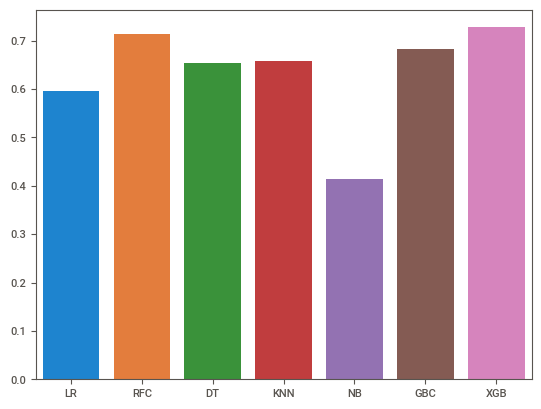

In [74]:
sns.barplot(x= ['LR','RFC','DT','KNN','NB','GBC','XGB'],y=accuracy_scores)